## Exploring Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# from sklearn.metrics import plot_roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
import keras



2024-08-05 06:41:21.325878: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 06:41:21.326007: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 06:41:21.488848: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")

In [3]:
df.shape

(2392, 15)

In [4]:
df.drop('StudentID', axis=1,inplace = True)
df.head()


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
df.shape

(2392, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 261.8 KB


In [7]:
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [8]:
df.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

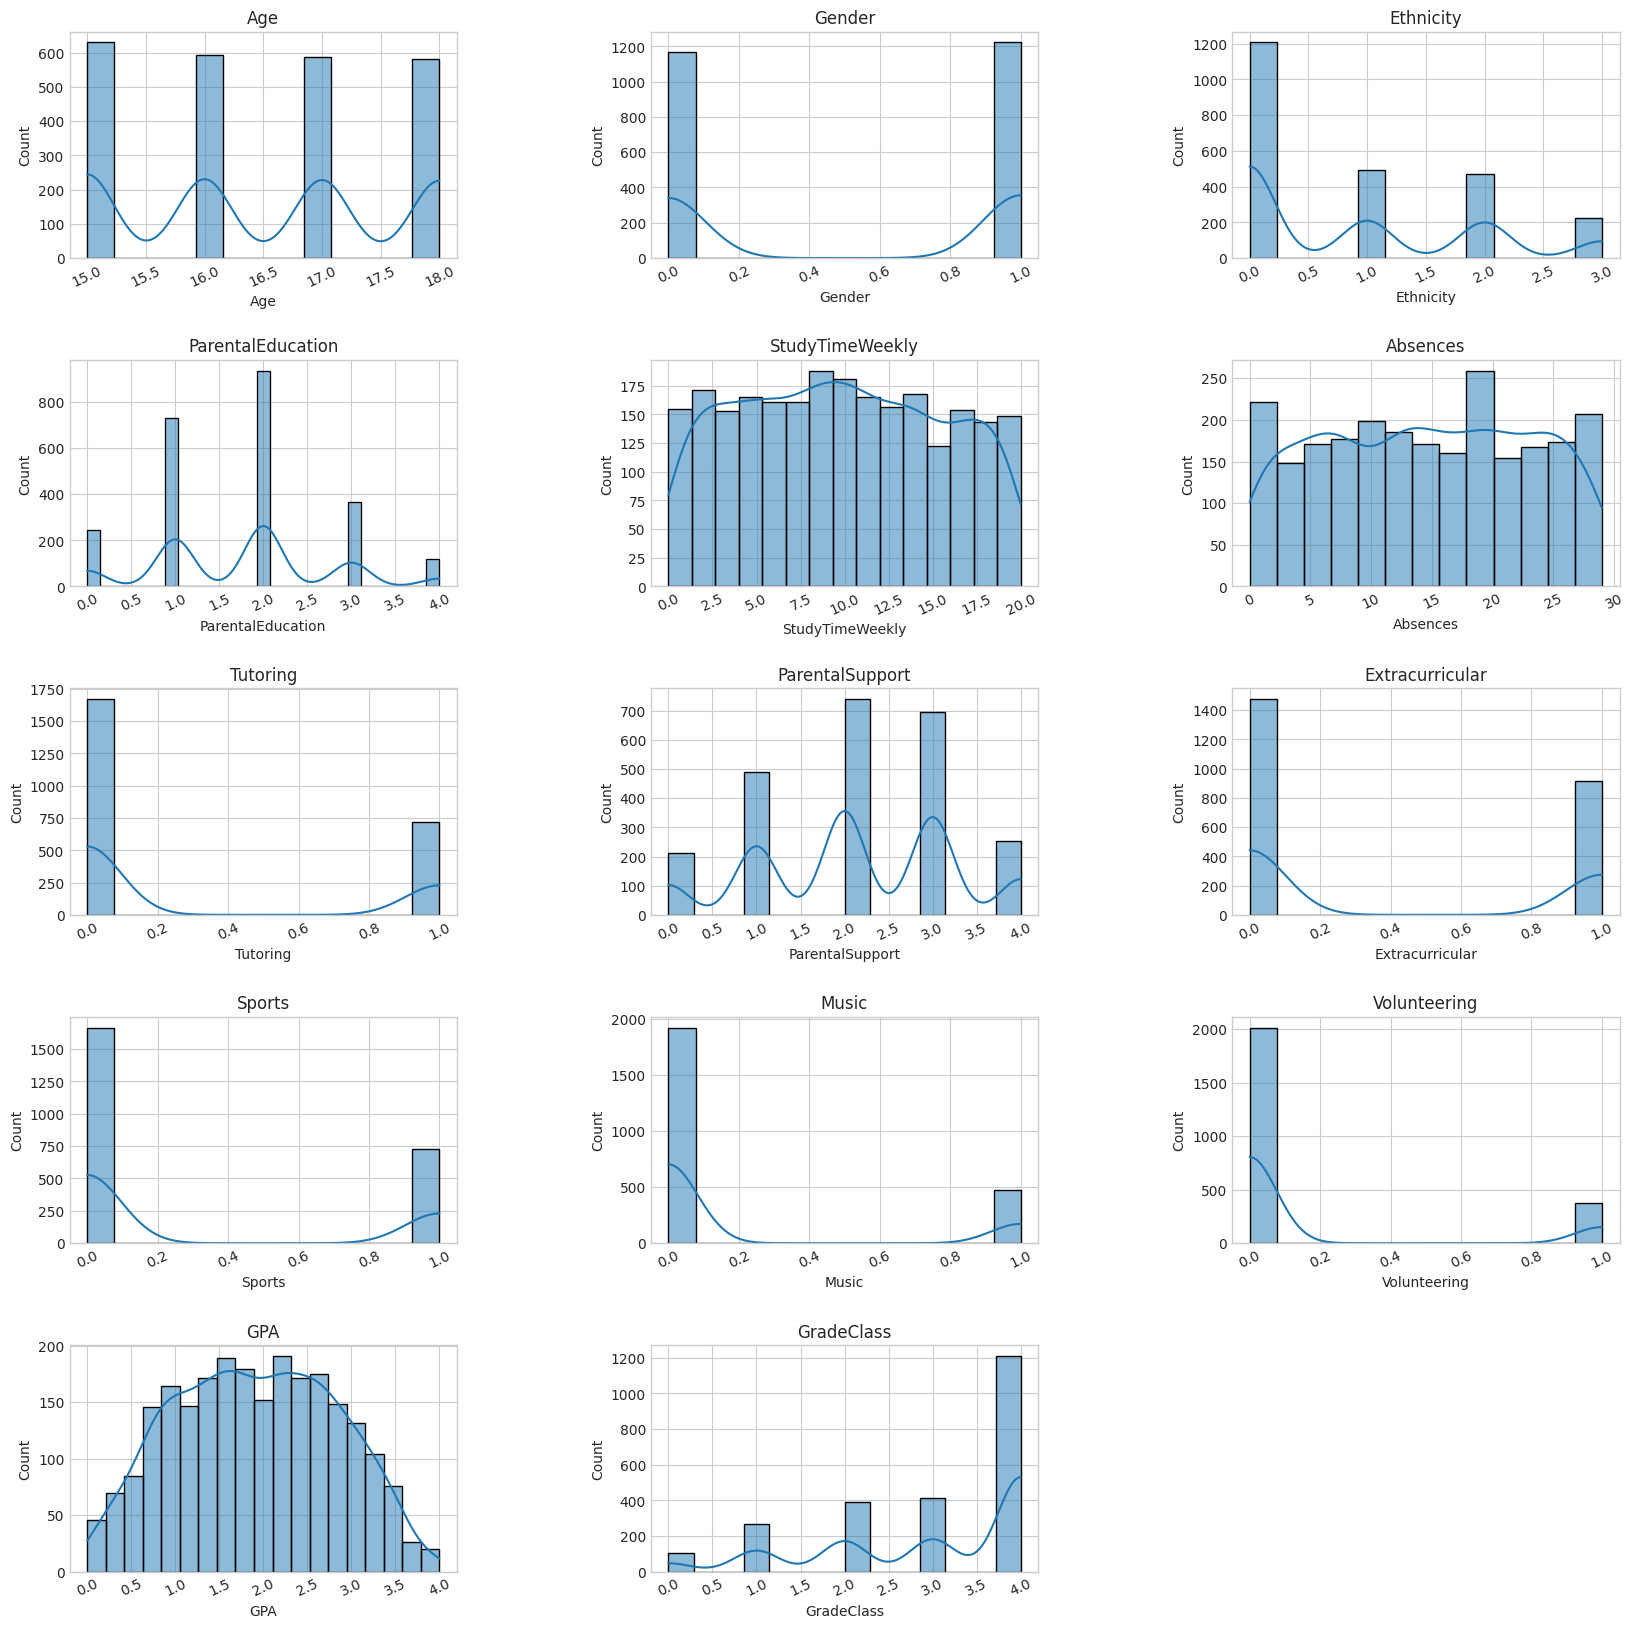

In [9]:
def plot_distribution(dataframe, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-v0_8-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataframe.shape[1]) / cols)
    for i, column in enumerate(dataframe.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        sns.histplot(dataframe[column], kde=True, ax=ax)
        plt.xticks(rotation=25)

plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)


 from the graph we have a class ImBalance Most of the students has a a low GPA .. GradClass is 4 less than 2 GPA

In [10]:

df['GradeClass'].value_counts()


GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

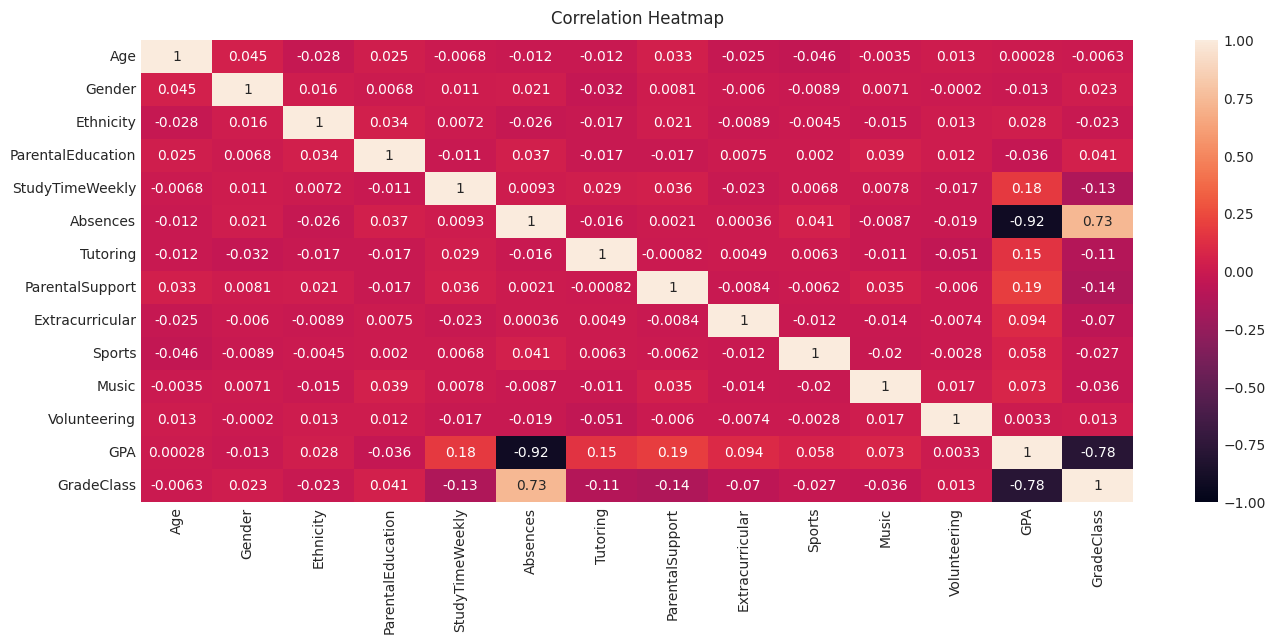

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


Strong negative Correlation between the absenses and the gpa

In [12]:
ethnicity_mapping = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
parental_education_mapping = {0: 'None', 1: 'High School', 2: 'Some College', 3: "Bachelor's", 4: 'Higher'}
tutoring_mapping = {0: 'No', 1: 'Yes'}
parental_support_mapping = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
extracurricular_mapping = {0: 'No', 1: 'Yes'}
sports_mapping = {0: 'No', 1: 'Yes'}
music_mapping = {0: 'No', 1: 'Yes'}
volunteering_mapping = {0: 'No', 1: 'Yes'}

df_copy = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")
df_copy['Ethnicity'] = df['Ethnicity'].map(ethnicity_mapping)
df_copy['ParentalEducation'] = df['ParentalEducation'].map(parental_education_mapping)
df_copy['Tutoring'] = df['Tutoring'].map(tutoring_mapping)
df_copy['ParentalSupport'] = df['ParentalSupport'].map(parental_support_mapping)
df_copy['Extracurricular'] = df['Extracurricular'].map(extracurricular_mapping)
df_copy['Sports'] = df['Sports'].map(sports_mapping)
df_copy['Music'] = df['Music'].map(music_mapping)
df_copy['Volunteering'] = df['Volunteering'].map(volunteering_mapping)

In [13]:
df_copy.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,2.0
1,1002,18,0,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,1.0
2,1003,15,0,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,4.0
3,1004,17,1,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,3.0
4,1005,17,1,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,4.0


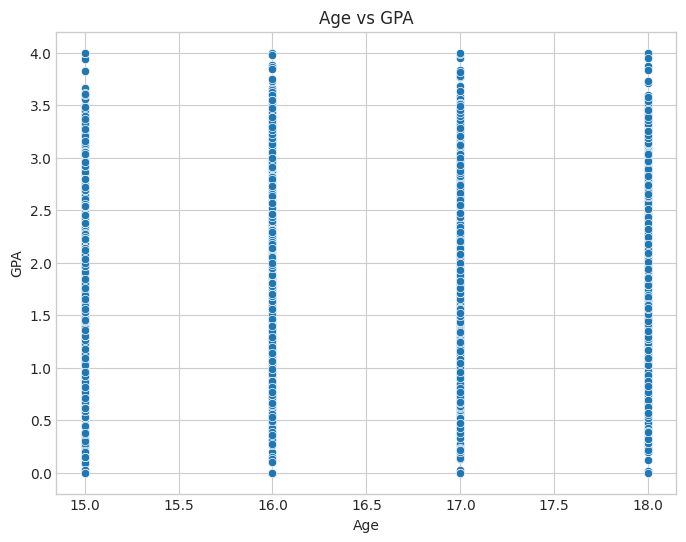

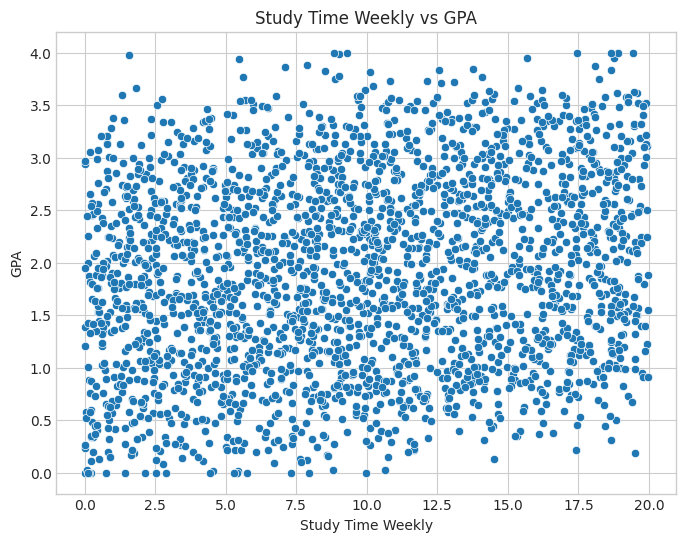

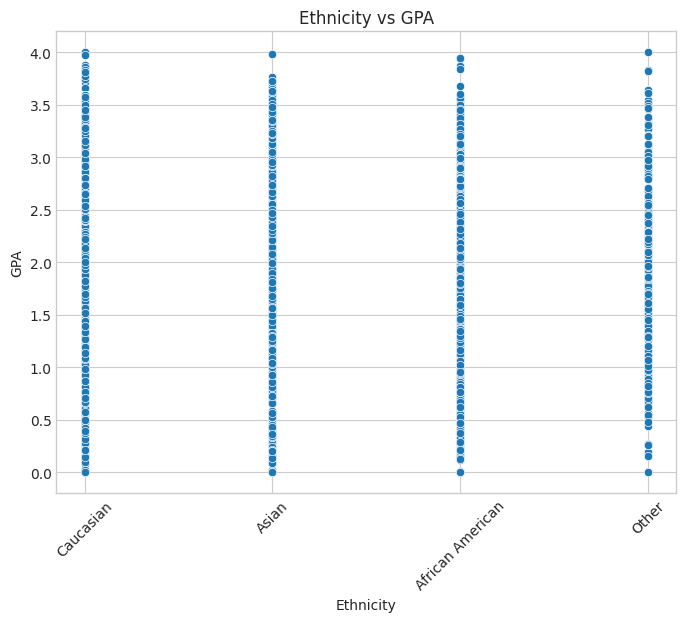

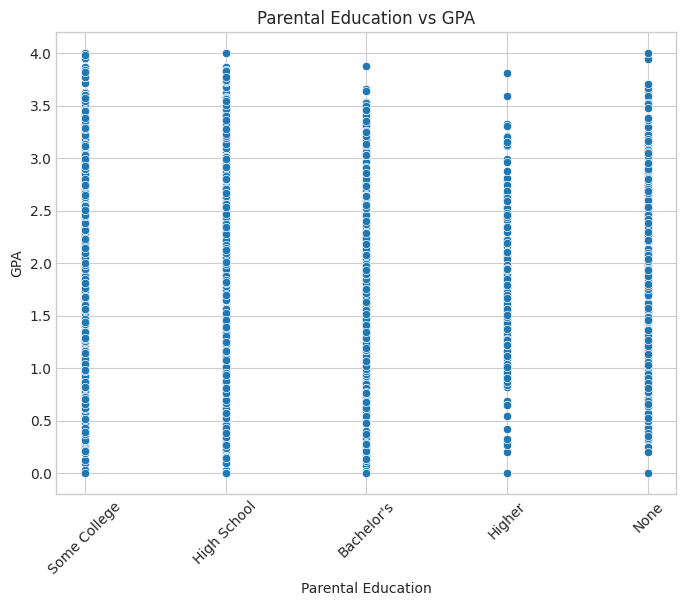

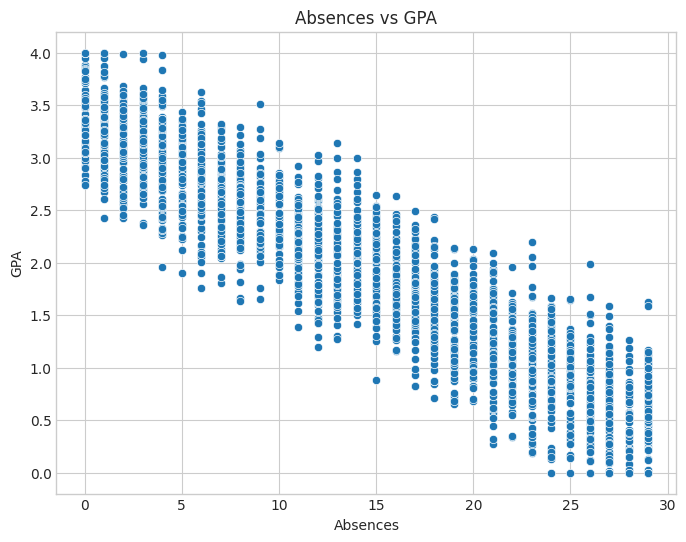

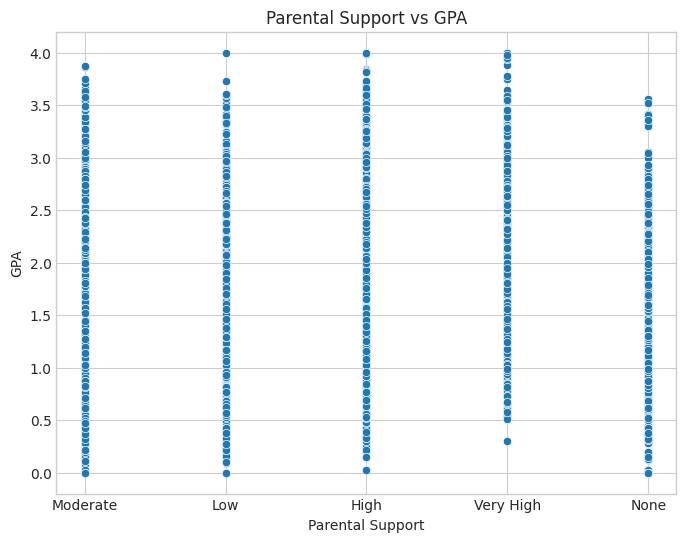

In [14]:
def analyze_factors(df):
  """
  Analyzes the relationship between various factors and GPA.

  Args:
    df: Pandas DataFrame containing student performance data.
  """

  # Age vs GPA
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='Age', y='GPA', data=df)
  plt.title('Age vs GPA')
  plt.xlabel('Age')
  plt.ylabel('GPA')
  plt.show()

  # StudyTimeWeekly vs GPA
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=df)
  plt.title('Study Time Weekly vs GPA')
  plt.xlabel('Study Time Weekly')
  plt.ylabel('GPA')
  plt.show()

  # Ethnicity vs GPA
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='Ethnicity', y='GPA', data=df)
  plt.title('Ethnicity vs GPA')
  plt.xlabel('Ethnicity')
  plt.ylabel('GPA')
  plt.xticks(rotation=45)
  plt.show()

  # Parental Education vs GPA
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='ParentalEducation', y='GPA', data=df)
  plt.title('Parental Education vs GPA')
  plt.xlabel('Parental Education')
  plt.ylabel('GPA')
  plt.xticks(rotation=45)
  plt.show()

  # Absences vs GPA
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='Absences', y='GPA', data=df)
  plt.title('Absences vs GPA')
  plt.xlabel('Absences')
  plt.ylabel('GPA')
  plt.show()

  # Parental Support vs GPA
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='ParentalSupport', y='GPA', data=df)
  plt.title('Parental Support vs GPA')
  plt.xlabel('Parental Support')
  plt.ylabel('GPA')
  plt.show()


analyze_factors(df_copy)


Absences seem to be our most important feature

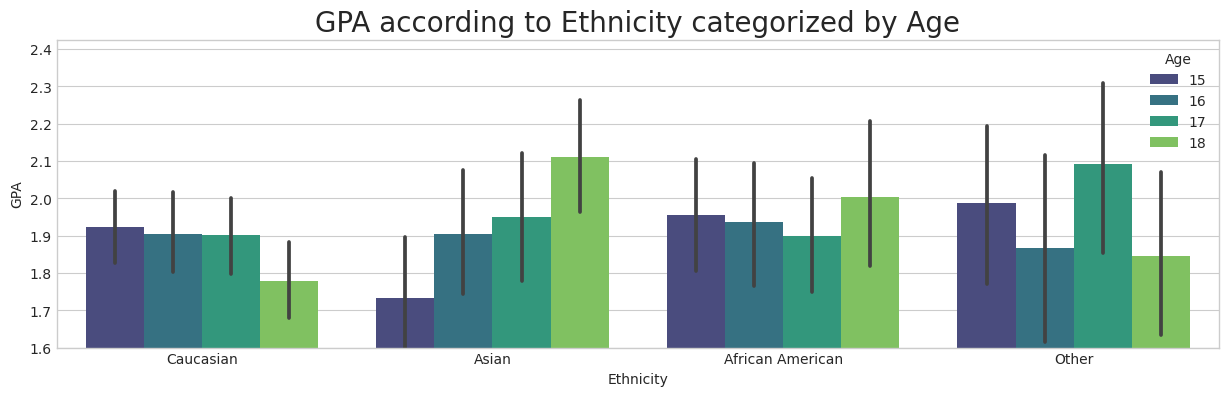

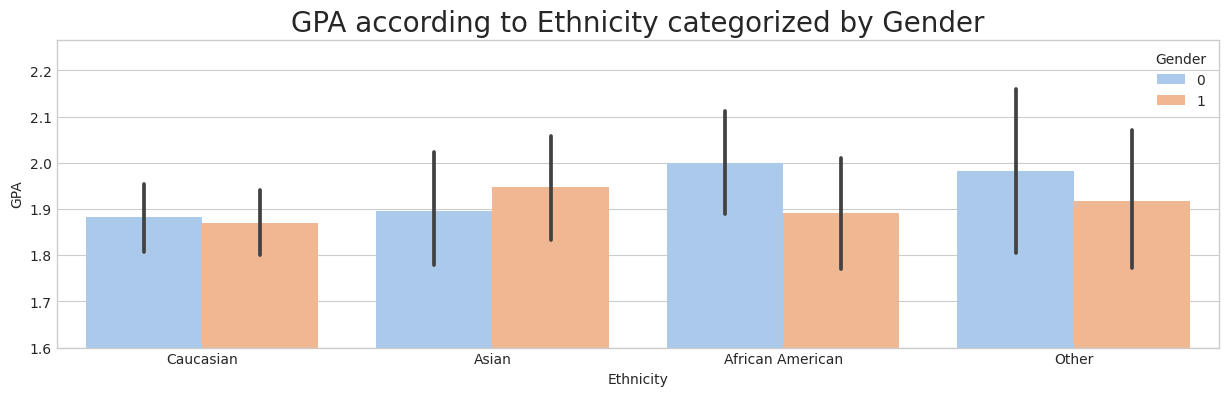

In [15]:
# Plot 1: GPA according to Ethnicity categorized by Age
plt.figure(figsize=(15, 4))
sns.barplot(x='Ethnicity', y='GPA', hue='Age', data=df_copy, palette='viridis')  # Use a categorical palette here
plt.ylim(bottom=1.6)
plt.title("GPA according to Ethnicity categorized by Age", fontsize=20)
plt.show()

# Plot 2: GPA according to Ethnicity categorized by Gender
plt.figure(figsize=(15, 4))
sns.barplot(x='Ethnicity', y='GPA', hue='Gender', data=df_copy, palette='pastel')  # Use a different categorical palette
plt.ylim(bottom=1.6)
plt.title("GPA according to Ethnicity categorized by Gender", fontsize=20)
plt.show()

1) Age does not matter in most of the case ...it matters if u are an asian .older asian are doing better than younger asian students

2) Female Students have better results in average


## Data Preprocessing

In [16]:
df.drop('GPA', axis = 1, inplace = True)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


In [17]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.0


In [18]:
x = df.drop('GradeClass',axis = 1)
y = df['GradeClass']
x.shape,y.shape

((2392, 12), (2392,))

In [19]:
x.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,17,1,0,2,19.833723,7,1,2,0,0,1,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0


In [20]:
scaler = StandardScaler()
features = ['StudyTimeWeekly', 'Absences', 'Age']
x[features] = scaler.fit_transform(x[features])


In [21]:
x.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,0.472919,1,0,2,1.780336,-0.890822,1,2,0,0,1,0
1,1.362944,0,0,1,0.997376,-1.717694,0,1,0,0,0,0
2,-1.307132,0,2,3,-0.984045,1.353542,0,2,0,0,0,0
3,0.472919,1,0,3,0.045445,-0.063951,0,3,1,0,0,0
4,0.472919,1,0,2,-0.902311,0.290422,1,3,0,0,0,0


In [22]:
y = y.astype(int)
y.head()

0    2
1    1
2    4
3    3
4    4
Name: GradeClass, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((1674, 12), (718, 12), (1674,), (718,))

# Building ML Models

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.690808   0.665436  0.690808  0.671516
1                  SVM  0.699164   0.661312  0.699164  0.678881
2  K-Nearest Neighbors  0.608635   0.585702  0.608635  0.594817
3  Logistic Regression  0.688022   0.651356  0.688022  0.661904
4        Decision Tree  0.598886   0.601490  0.598886  0.599805
5          Naive Bayes  0.646240   0.613147  0.646240  0.622018


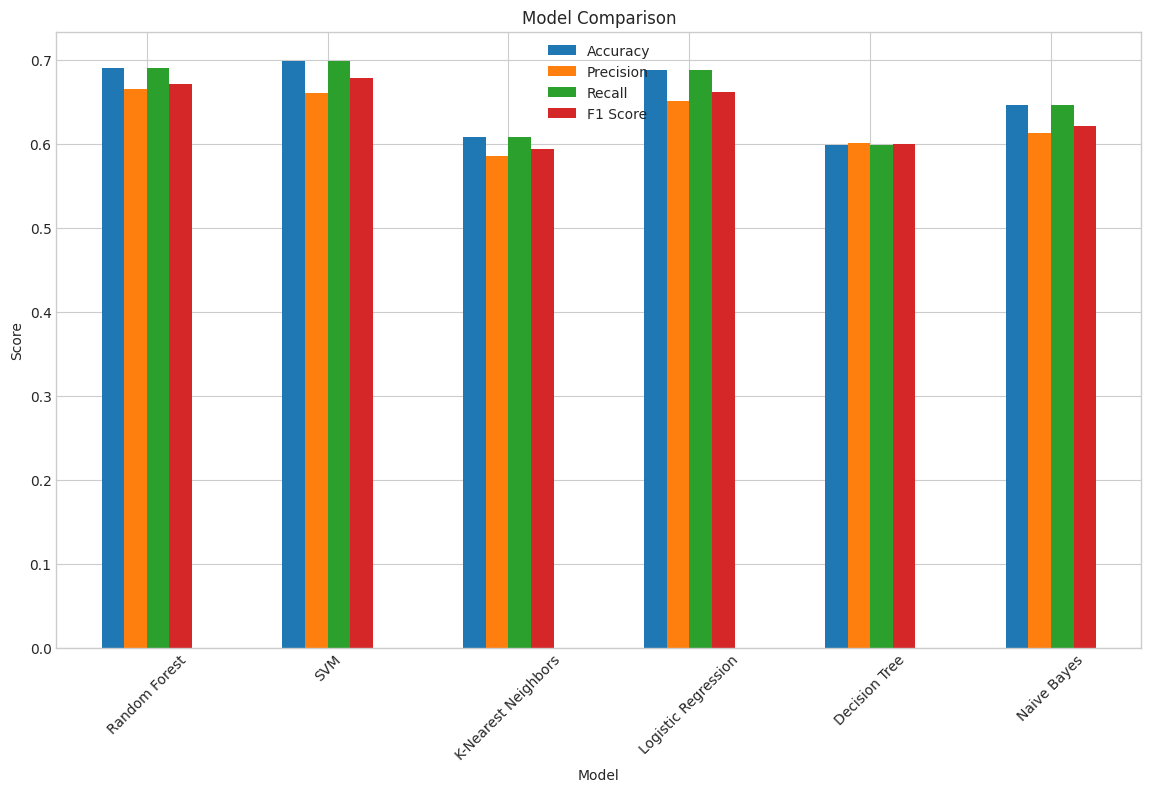

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Initialize a dictionary to store the metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],

}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)


    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    # Store the metrics
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)


# Convert metrics dictionary to DataFrame for easier comparison
metrics_df = pd.DataFrame(metrics)

# Display the metrics DataFrame
print(metrics_df)

# Plot the metrics for comparison
metrics_df.set_index('Model').plot(kind='bar', figsize=(14, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


**Support Vector Machine & Random Forrest acheiving good results comparing to others**

# Building NN

do the one hot encoder on the y_train and y_test

In [25]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)
y_train_cat.shape , y_test_cat.shape


((1674, 5), (718, 5))

In [26]:
y_train_cat[:5],y_train[:5]

(array([[0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]]),
 380     2
 226     4
 1075    3
 715     4
 1822    4
 Name: GradeClass, dtype: int64)

In [27]:
## preferable number of neurons to be in the for of 2^i
## preferable that layers distribution to be  :
KerasModel = keras.models.Sequential([
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(5, activation='softmax')
])

In [28]:
KerasModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy']) # matrix

In [29]:
history = KerasModel.fit(x_train ,y_train_cat,
                         validation_split  = 0.3 ,
                         epochs= 50 ,
                         batch_size=1,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=3,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])


Epoch 1/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4602 - loss: 1.4593 - val_accuracy: 0.4672 - val_loss: 1.1735
Epoch 2/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5581 - loss: 1.1425 - val_accuracy: 0.6083 - val_loss: 1.0369
Epoch 3/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5820 - loss: 1.0164 - val_accuracy: 0.6044 - val_loss: 0.9968
Epoch 4/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6221 - loss: 1.0080 - val_accuracy: 0.6163 - val_loss: 0.9783
Epoch 5/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6140 - loss: 0.9548 - val_accuracy: 0.6461 - val_loss: 0.9577
Epoch 6/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6584 - loss: 0.9413 - val_accuracy: 0.6600 - val_loss: 0.9521
Epoch 7/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6580 - loss: 0.9423 - val_accuracy: 0.6958 - val_loss: 0.9094
Epoch 8/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6827 - loss: 0.8618 - 

In [30]:
print(KerasModel.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (1, 128)               │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1, 128)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 64)                │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (1, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 32)                │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (1, 32)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (1, 5)                 │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,497 (142.57 KB)

 Trainable params: 12,165 (47.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,332 (95.05 KB)

None


In [31]:
KerasModel.save('KerasModel.model.h5')

# Evaluation

In [32]:
NewKerasModel = keras.models.load_model('KerasModel.model.h5')

In [33]:
y_pred = NewKerasModel.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [34]:
y_pred[:5] , y_test_cat[:5]

(array([[1.1695996e-02, 3.7173968e-02, 2.1979237e-02, 1.2932861e-01,
         7.9982221e-01],
        [1.0055954e-01, 2.1510899e-01, 4.6758187e-01, 1.9397390e-01,
         2.2775466e-02],
        [1.4748987e-02, 3.8508754e-02, 6.0850076e-02, 2.9642367e-01,
         5.8946848e-01],
        [3.6034504e-01, 5.0947660e-01, 1.2198704e-01, 8.0191446e-03,
         1.7216206e-04],
        [1.8318238e-04, 2.1401297e-03, 1.1815655e-04, 3.7460262e-03,
         9.9381250e-01]], dtype=float32),
 array([[0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.]]))

In [35]:
ModelLoss, ModelAccuracy = NewKerasModel.evaluate(x_test, y_test_cat)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7226 - loss: 0.7917  
Model Loss is 0.7885714173316956
Model Accuracy is 0.7367687821388245


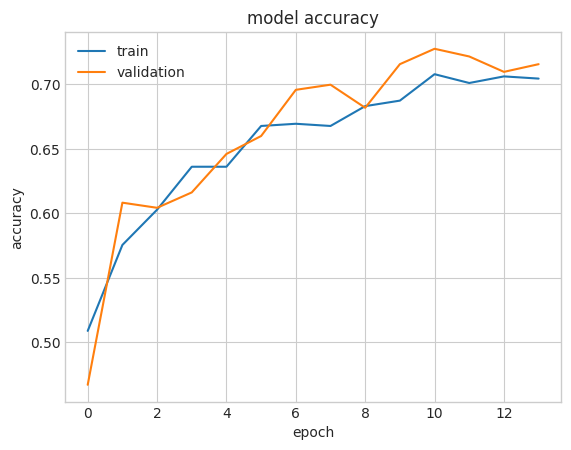

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

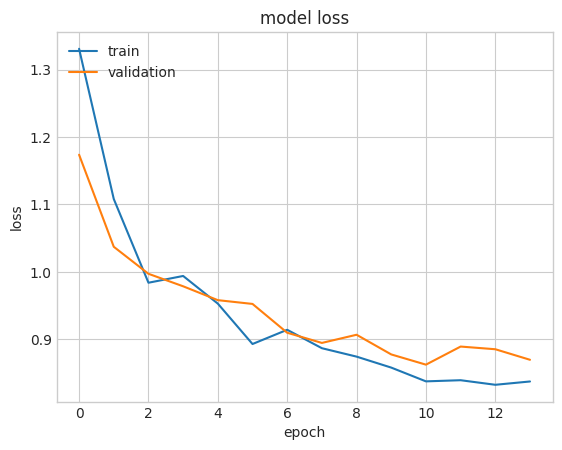

In [37]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Make a prediction

In [38]:
hardworking_student = {
    'Age': 0.472919,            # Assume a typical age (standardized value)
    'Gender': 1,                # Assume male (0 for female)
    'Ethnicity': 0,             # Assume one of the categories
    'ParentalEducation': 4,     # Higher education level
    'StudyTimeWeekly': 1.780336, # High study time (standardized value)
    'Absences': -1.717694,      # Low absences (standardized value)
    'Tutoring': 1,              # Receiving tutoring
    'ParentalSupport': 4,       # High parental support
    'Extracurricular': 1,       # High involvement in extracurricular activities
    'Sports': 1,                # Participates in sports
    'Music': 1,                 # Participates in music
    'Volunteering': 1           # Participates in volunteering
}
hardworking_student_df = pd.DataFrame([hardworking_student])


In [39]:
## A hardworking student receiving a 0 classgrade
prediction = NewKerasModel.predict(hardworking_student_df)
print("Predicted class probabilities:", prediction)
predicted_class = prediction.argmax(axis=1)
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted class probabilities: [[3.9814347e-01 5.3416795e-01 6.5575220e-02 2.0883514e-03 2.4956493e-05]]
Predicted class: [1]
